# Fourier Transforms

A means to describe waveforms as sinusoidal sums.

## Introduction

What is a sinusoid ? A sine wave. What is sine ? It is what we know from trigonometry. 

In [1]:
import matplotlib.pyplot as plt 
# conda install -c conda-forge matplotlib
import math

Here is a sine wave.

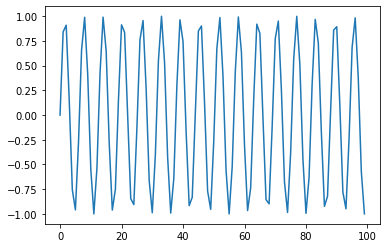

In [2]:
xvals = []
yvals = []
for i in range(100):
    xvals.append(i)
    yvals.append(math.sin(i))
    
plt.plot(xvals, yvals)

Let's make it a function.

In [3]:
def sinplot(sample_nb: int):
    xvals = []
    yvals = []
    for i in range(sample_nb):
        xvals.append(i)
        yvals.append(math.sin(i))
    
    plt.plot(xvals, yvals, xvals, [0 for i in range(len(xvals))])

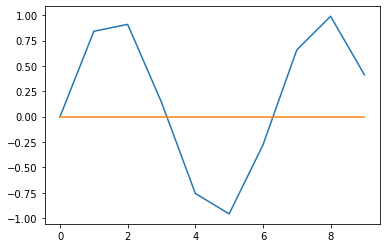

In [4]:
sinplot(10)

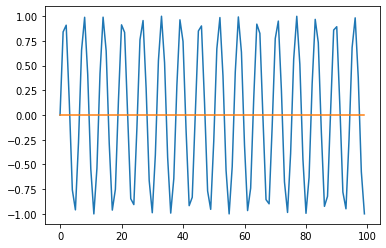

In [5]:
sinplot(100)

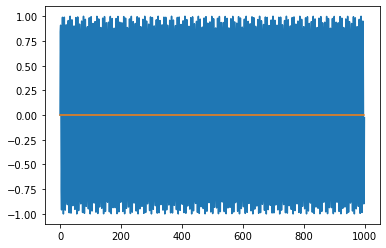

In [6]:
sinplot(1000)

The above demonstration should make it clear,
that the frequency of sine waves can help us 
to describe different shapes. Notice that it is periodic,
since $sin(x) = sin(x+2\pi)$ where $x \in \mathbb{R}$

In its most basic 
form a sine wave can be described as a function of
time as in 
$$y(x) = a\sin k(x + \beta)$$ 

We shall see what each element does as we advance

Let's implement this.

In [35]:
def sinfn(a,k, beta, t): return a*math.sin(k*(t+beta))

def sinmap(a,k,beta,sample_nb, fn=sinfn):
    xvals=list(range(sample_nb))
    yvals=[fn(a,k,beta,i) for i in xvals]
    return xvals, yvals

def sinMultiMap(amps: [int], 
                periods: [int], 
                shifts: [int], 
                sample_nb, 
                fns: list):
    if (any([a <= 0 for a  in amps]) or 
        any([k <=0 for k in periods])):
        raise ValueError("all amps and shifts must be positive")
    lst = []
    for i in range(len(amps)):
        a = amps[i]
        k = periods[i]
        beta = shifts[i]
        fn = fns[i]
        xs, ys = sinmap(a,k,beta, sample_nb, fn)
        lst.append(xs)
        lst.append(ys)
    return lst
    

def sinwave_plot(a,k,beta, sample_nb, fn=sinfn):
    if a <= 0 or k <= 0:
        raise ValueError("a and k must be positive")
    xvals, yvals = sinmap(a,k,beta,sample_nb, fn)
    plt.plot(xvals, yvals, xvals, [0 for i in range(len(xvals))])
    

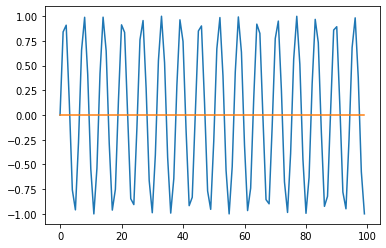

In [36]:
sinwave_plot(a=1,k=1,beta=0,sample_nb=100) # sin(x)

As we have stated the sin function is periodic. 
A period is formally defined as:
<q>The period of a periodic function f(x) is the smallest positive real number p such that f(x+p) = f(x) for all values of x for which f(x) and f(x+p) are defined (Saul 2001)</q>

For sine function $p=2\pi$. For example for sin(3x) its period is $\frac{2\pi}{3}$ since $\sin(3(x+ \frac{2\pi}{3})$

$\sin(60) = \sin(60 + 2\pi)$

Let's plot this function

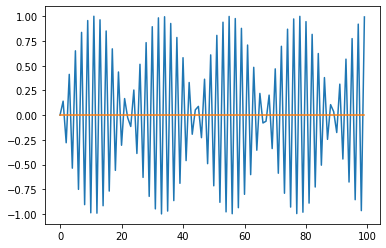

In [12]:
sinwave_plot(a=1,k=3,
             beta=2*math.pi/3,
             sample_nb=100) # sin(3(x + 2pi/3))

Let's verify if it is indeed periodic by multiplying beta with an arbitrary number.

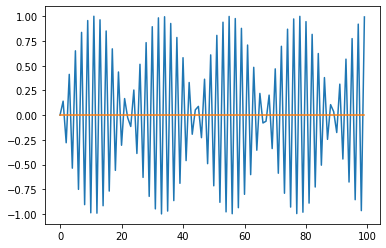

In [13]:
sinwave_plot(a=1,k=3,
             beta=2*math.pi/3 * 9, # 9 is arbitrary
             sample_nb=100) # sin(3(x + 2pi/3))

How do we change the amplitude, the peak of the waves, of these functions ? By using the parameter a. Let's see. 

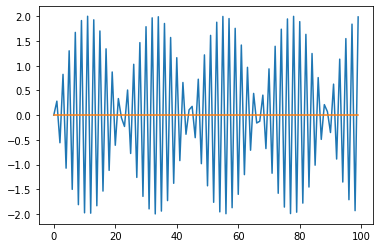

In [14]:
sinwave_plot(a=2,k=3,
             beta=2*math.pi/3,
             sample_nb=100) # sin(3(x + 2pi/3))

Notice that our y axis ranges from -2 to 2 now.

Before going further let's implement how to plot 2 waves.

In [10]:
def n_sinewave_plot(amps, periods, shifts, sample_nb, fns):
    plotable = sinMultiMap(amps, periods, shifts, sample_nb, fns)
    
    plt.plot(*plotable)
    
def double_sinewave_plot(a1: int,k1:int,beta1:int,
                    a2:int, k2:int, beta2:int, sample_nb: int):
    n_sinewave_plot([a1, a2], [k1, k2], [beta1, beta2], sample_nb,
                    [sinfn, sinfn])


Now let's see if we can shift sine waves

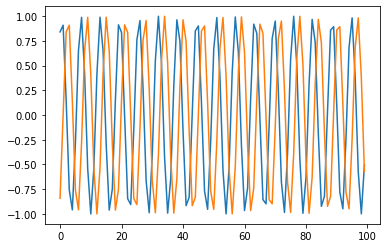

In [11]:
double_sinewave_plot(a1=1, 
                     k1=1,
                     beta1=1,
                     a2=1,
                     k2=1,
                     beta2=-1,
                     sample_nb=100)

As you can see beta controls the shift of sine wave. 

With this we had seen the function of three major parameters of the 
sine wave: 
<dl>
    <dt>a</dt>
    <dd>is the amplitude of sine wave. It gives us how far from the zero the functions can get. It must be a positive value</dd>
    <dt>k</dt>
    <dd>is the periodicity/frequency of sine wave. It gives us how many periods are repeated within an interval of $2\pi$. The period of the curve is $2\pi/k$. It must be a positive value</dd>
    <dt>$\beta$</dt>
    <dd>is phase or phase shift of sine wave. It can be an arbitrary value</dd>
</dl>

What about cosine ? Well since $\cos(x) = \sin(\frac{\pi}{2} - x)$, it basically means we shift x to the left by $\pi /2$. 
Let's implement this.

In [12]:
def coswave_plot(a,k,beta, sample_nb):
    sinwave_plot(a,k,beta + math.pi/2, sample_nb)

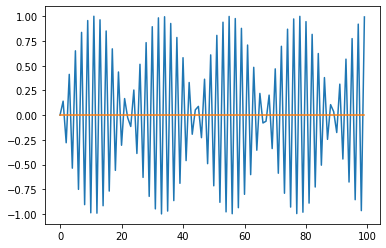

In [13]:
sinwave_plot(a=1,k=3,
             beta=2*math.pi/3,
             sample_nb=100) # sin(3(x + 2pi/3))

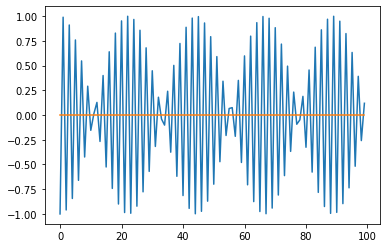

In [14]:
coswave_plot(a=1,k=3,
             beta=2*math.pi/3,
             sample_nb=100) # cos(3(x + 2pi/3))

What if we want to combine these expressions ? 
For example add them together? 

In [17]:
def add_sinewaves(amps: [int],
                  periods: [int],
                  shifts: [int],
                  sample_nb: int, fns: list):
    "add sine waves to each other"
    yss = sinMultiMap(amps, periods, shifts, sample_nb, fns)
    yss = [yss[i] for i in range(len(yss)) if i % 2 != 0]
    added_wave = []
    srange = list(range(sample_nb))
    for i in srange:
        counter = 0
        for k in range(len(amps)):
            counter += yss[k][i]
        added_wave.append(counter)
    return added_wave

def combined_sinewave_plot(amps: [int],
                           periods: [int],
                           shifts: [int],
                           sample_nb: int, fns: list):
    "plot added sine waves"
    
    plotable = add_sinewaves(amps, periods, shifts, sample_nb, fns)
    srange = list(range(sample_nb))
    plt.plot(srange, plotable, # yellow dash for second sin wave
            )

Let's plot individual and combined sinewaves.

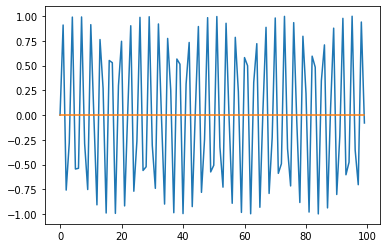

In [18]:
sinwave_plot(a=1, k=2, beta=0, sample_nb=100)

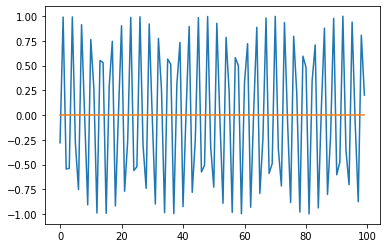

In [19]:
sinwave_plot(a=1, k=2, beta=3, sample_nb=100)

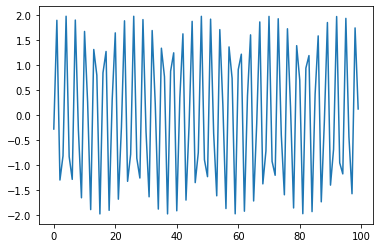

In [20]:
combined_sinewave_plot(amps=[1,1], 
                       periods=[2, 2], 
                       shifts=[0, 3], 
                       sample_nb=100, fns=[sinfn, sinfn])

What if we change the amplitude as well?

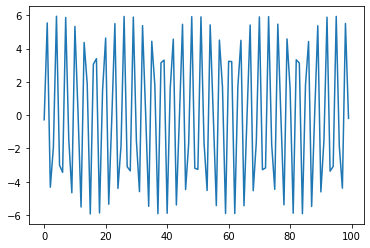

In [21]:
combined_sinewave_plot(amps=[5,1], 
                       periods=[2, 2], 
                       shifts=[0, 3], 
                       sample_nb=100,
                       fns=[sinfn, sinfn])

What if we change the frequency ?

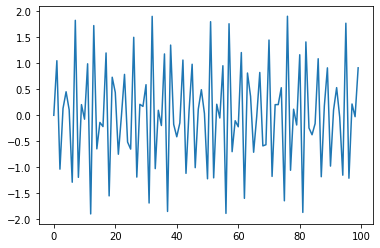

In [22]:
combined_sinewave_plot(amps=[1,1], 
                       periods=[3, 2], 
                       shifts=[0, 0], 
                       sample_nb=100, fns=[sinfn, sinfn])

This demonstration should have made it clear that for sine waves that 
have the same frequency addition of them produces another sine wave.
However once they differ in frequency, we loose the property of
obtaining a new sine wave. Of course we do not expect that you
would be satisfied with simple demonstrations for the truth of that
statement. You can consult (Saul 2001) p, 192 for a proof.

How about combining sine and cosine to obtain a linear combination ?

If a linear combination is $af(x) + bg(x)$ where a and b are 
constants, let's draw k(x) where $k(x) = 3\sin(x) + 4\cos(x)$

In [23]:
def linear_sinwave_combination_plot(amps: [int],
                                    periods: [int],
                                    shifts: [int],
                                    fns: list,
                                    sample_nb: int,):
    if (any([a <= 0 for a  in amps]) or 
        any([k <=0 for k in periods])):
        raise ValueError("all amps and shifts must be positive")
    yss = []
    xvals1 = list(range(sample_nb))
    yss = sinMultiMap(amps, periods, shifts, sample_nb, fns)
    plotable = []
    for i in range(len(xvals1)):
        counter = 0
        for k in range(len(amps)):
            counter += yss[k][i]
        plotable.append(counter)
    plt.plot(xvals1, plotable, # yellow dash for second sin wave
             xvals1, [0 for i in range(len(xvals))] # midline
            )

def cosfn(a,k, beta, t): return sinfn(a,k,beta+math.pi/2,t)

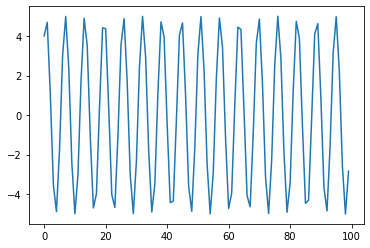

In [24]:
combined_sinewave_plot(amps=[3, 4], periods=[1, 1],
                               shifts=[0, 0],
                               fns=[sinfn, cosfn],
                               sample_nb=100)

From the result, it should also be obvious that linear combination 
of the form $A\sin(x) + B\cos(x)$ is also a sine wave. Again the 
curious user can see Saul 2001, p. 190 for a proof.

Let's see what we can do with sine waves whose frequencies do not agree. Let's graph $y=x + \sin(x)$ and $y=x^2 + \cos(x)$ and lastly
$y= \sin(x) + 1/3 \sin(3x)$

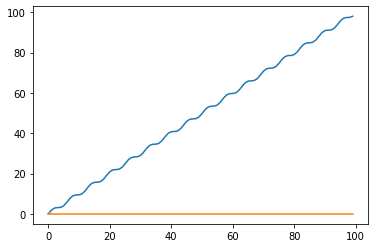

In [25]:
def f(a,k,b,t): return t + sinfn(a,k,b,t)

sinwave_plot(a=1, k=1, beta=0,
             sample_nb=100,
             fn=f)

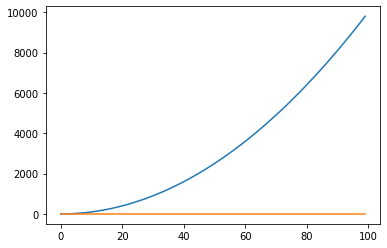

In [26]:
# x^2 + cos(x)
sinwave_plot(a=1, k=1, beta=0, 
             sample_nb=100,
             fn=lambda x,y,z,t: (t**2)+cosfn(x,y,z,t))

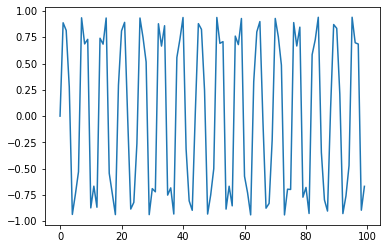

In [27]:
#y= \sin(x) + 1/3 \sin(3x)
combined_sinewave_plot(amps=[1/3,1], 
                       periods=[3, 1], 
                       shifts=[0, 0], 
                       sample_nb=100, fns=[sinfn, sinfn])

Let's make it a little more explicit what's happening here.

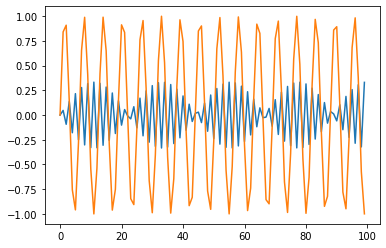

In [28]:
# let's make whats happening a little more explicit
double_sinewave_plot(1/3, 3,0, 1,1,0, 100)

To put it bluntly, the sine values of the function $\sin(x)$ is disturbed by $1/3\sin(3x)$. Now let us compare three graphs:
$$y = \sin(x)$$
$$y = \sin(x) + 1/3 \sin(3x)$$
$$y = \sin(x) + 1/3 \sin(3x) + 1/5 \sin(5x)$$

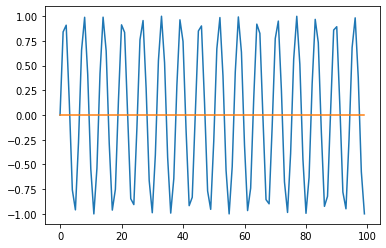

In [33]:
# first one
sinwave_plot(a=1, k=1, beta=0,
             sample_nb=100)

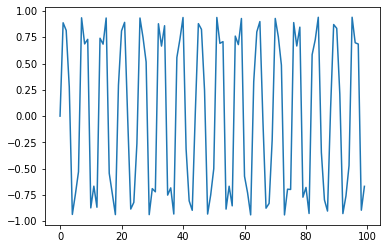

In [34]:
# second one
combined_sinewave_plot(amps=[1/3,1], 
                       periods=[3, 1], 
                       shifts=[0, 0], 
                       sample_nb=100, fns=[sinfn, sinfn])

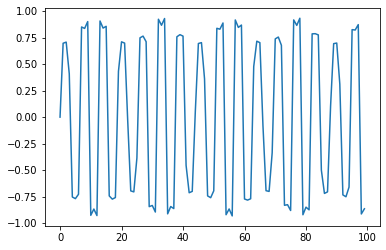

In [35]:
# third one
combined_sinewave_plot(amps=[1,1/3, 1/5], 
                       periods=[1, 3, 5], 
                       shifts=[0, 0, 0], 
                       sample_nb=100, fns=[sinfn, sinfn, sinfn])

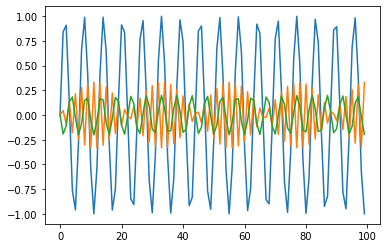

In [36]:
# let's look at the last one more closely
n_sinewave_plot(amps=[1,1/3, 1/5], 
                       periods=[1, 3, 5], 
                       shifts=[0, 0, 0], 
                       sample_nb=100, fns=[sinfn, sinfn, sinfn])

Notice the sequence $\int_a^{\infty} a\sin(\frac{1}{a}x) da$ of sin functions which give the corresponding waves.

This sequence converges to a limit. 
In fact any periodic function, that is anything that repeats over time, can be described using the limit of the sum of sins and cosines. It is a way to approximate patterns, anything that repeats, 
using sine waves.
This is the insight that Fourier had when he described Fourier Series and their analysis.

Let's see if we can implement a fourier series graphing function:

In [29]:
def fourier_series_plot(upper_limit: int, sample_nb: int, fn):
    serie = []
    for s in range(sample_nb):
        sinsum = 0
        for i in range(upper_limit):
            sinsum += fn(s, i)
        serie.append(sinsum)
    return serie, list(range(sample_nb))

In [30]:
# some common shapes as fourier series
def square_wave_fn(s, i): return math.sin((2*i-1) * s) / (2*i-1)
def pulse_wave_fn(s, i): return math.sin(i*s) * 0.1

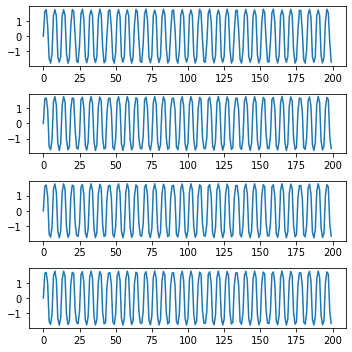

In [31]:
s1, r1 = fourier_series_plot(5, 200, square_wave_fn)
s2, r2 = fourier_series_plot(50, 200, square_wave_fn)
s3, r3 = fourier_series_plot(250, 200, square_wave_fn)
s4, r4 = fourier_series_plot(500, 200, square_wave_fn)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5,5))
axes[0].plot(r1, s1)
axes[1].plot(r2, s2)
axes[2].plot(r3, s3)
axes[3].plot(r4, s4)
fig.tight_layout()

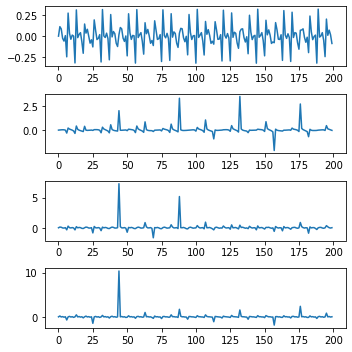

In [32]:
s1, r1 = fourier_series_plot(5, 200, pulse_wave_fn)
s2, r2 = fourier_series_plot(50, 200, pulse_wave_fn)
s3, r3 = fourier_series_plot(250, 200, pulse_wave_fn)
s4, r4 = fourier_series_plot(500, 200, pulse_wave_fn)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5,5))
axes[0].plot(r1, s1)
axes[1].plot(r2, s2)
axes[2].plot(r3, s3)
axes[3].plot(r4, s4)
fig.tight_layout()

By now it should be visually convincing that we can make other function graphs using sinoids.
The nice thing is that the function graph might look complicated, but in most cases
sinoids are not that complicated. They have 3 major parameters: amplitude, frequency and shift.

So it is reasonable to decompose a signal coming as above to its sinoids to easily work with it.
How do we do that ?

We already now all of the tools necessary to find a solution to this question.

Our current scope does not permit us to fully elaborate the origin of this function.
But here is a brief sketch: We model the one half period of the function with sinoid and the other half with cosinoid.
We then say that any graph of a function can be modelled as an addition of these two functions. 

How many additions do we require ? That is the resulting function comes from how much adding of these two functions ?
Mathematically solid response is to say that infinitely many.
In discrete version we use samples as we shall see below.

Formally Fourier transform of a function can be written as the following:
$$\hat{f}(b) = \int_{-\infty}^{\infty}f(x) e^{-2\pi i x b}dx$$

Originally Fourier expressed the problem without complex numbers,
since it is somewhat easier to grasp let's see those as well:
$$ \hat{f}(t) = f(\tau) = \int_{0}^{\infty} (a(\lambda)\cos(2\pi \lambda t) + b(\lambda)\sin(2 \pi \lambda t)) d\lambda$$

The cosine transform coefficient function $a: \mathbb{R} \to \mathbb{R}$ and
sine transform coefficient function $b: \mathbb{R} \to \mathbb{R}$ can be 
obtained with following formulas: 
$$ a(\lambda) = 2 \int_{-\infty}^{\infty} f(t) \cos(2\pi \lambda t) dt$$
$$ b(\lambda) = 2 \int_{-\infty}^{\infty} f(t) \sin(2\pi \lambda t) dt$$

The inverse of Fourier transformation can be found using:
$$f(t) = 2 \int_{0}^{\infty} \int_{-\infty}^{\infty} \hat{f}(t) \cos(2 \pi \lambda (\tau - t) )d\tau d\lambda $$

Now machines do not have infinite memory thus all the mathematics need to be reformulated in its discrete form.
The Discrete Fourier Transform can be written as the following:
$$X_k = \sum_{n=0}^{N-1}x_n \cdot e^{-\frac{i2\pi}{N}kn} = \sum_{n=0}^{N-1}x_n \cdot [\cos(\frac{2\pi}{N}kn)-i \cdot \sin(\frac{2\pi}{N}kn)]$$ where

<dl>
    <dt>N</dt><dd>is the number of terms in the sequence $X_k$</dd>
    <dt>n</dt><dd>is the index of the sample that is being evaluated</dd>
    <dt>$X_k$</dt><dd>is the resulting sequence</dd>
    <dt>$x_n$</dt><dd>is the sample that is being evaluated</dd>
    <dt>k</dt><dd>is frequency as in $y(x) = a\sin k(x + \beta)$</dd>
    <dt>i</dt><dd>is for the imaginary part of the complex number</dd>
</dl>


Let's see its implementation in standard library.

In [1]:
import cmath
from typing import List

def dft(x_n, N, k, n):
    "The function that is being integrated"
    pi = cmath.pi
    pi2Nkn = 2 * pi / N * k * n
    return x_n (cmath.cos(pi2Nkn) - 1j * cmath.sin(pi2Nkn))

def discrete_fourier_transform(xs: List[float]):
    "Implementation of discrete fourier transform in standard library"
    N = len(xs)
    ks = list(range(N)) # possible periods
    output: List[complex] = []
    for i in range(len(xs)):  # n for the nth element of input list
        x_n = xs[i]
        k = ks[i]
        # now for each k we do the summation
        s = complex(0)
        for n in range(N):
            s += dft(x_n=x_n, N=N, k=k, n=n)
        output.append(s)
    return output

## Fourier Transform

Before we get into the details of how we arrive to this formula, let us express what it does.
It basically takes a time domain and converts it into a frequency domain. 
I give it a function that operates between $t_1, \dots, t_n$, and it gives me back how cyclic/periodic the function is.

A nice example that has been used to explain Fourier transforms is that of a pizza, or smoothie. 
Your function gives you a smoothie, and fourier transform finds its ingredients.
How does it do that ? 
By using small captors specializing on detecting each ingredient:
a captor for lemon, a captor for apple, a captor for orange, etc.

In order to have this capacity we need to:

- have captors for all possible ingredients

- have captors that are unique to ingredients, each captor detecs 
  a single ingredient
  
- have seperable and combinable ingredients. You seperate smoothie to
  its ingredients, and then combine them again and you would obtain
  a smoothie again. You seperate a cake to its ingredients, would     
  you be able to combine it to obtain the cake from its crumbles.

Our implementation does not cover the edge cases and 
it would be incredibly slow to compute,
luckily there is another implementation called 
Fast Fourier Transform that we would be using to
calculate it. 
The implementation is available in numpy.


Let's make a small demonstration. We have 
signal made up of three frequencies: 20hz, 50hz, 80hz.

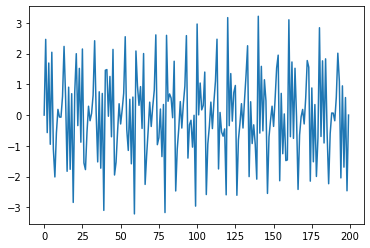

In [43]:
import numpy as np

def add_sinewaves_np(amps: list, periods: list, shifts: list, sample_nb: int):
    ts = np.linspace(0, 1, sample_nb)
    serie = np.zeros_like(ts) 
    for i in range(len(amps)):
        a = amps[i]
        k = periods[i]
        b = shifts[i]
        serie += a * np.sin(k * 2 * np.pi * ts + b)
    return serie, ts

combined_wave, ts = add_sinewaves_np(amps=[1,1,1, 1], periods=[20, 50, 80, 90], shifts=[0,0,0, 0], 
                              sample_nb=200)

# lets plot the combined wave
plt.plot(combined_wave)

Now let's see what we can get by using fourier transformation.

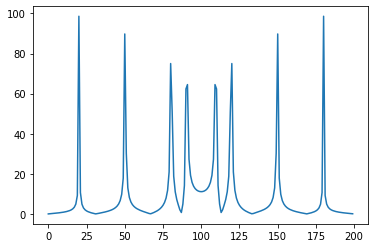

In [44]:
result = np.fft.fft(np.array(combined_wave)) # fft -> fast fourier transform module
# let's plot the result
plt.plot(np.abs(result)) # converting complex values to real ones with absolute function

From the graph it looks like second half of it does not contain any new information. 

Let's verify that.

In [45]:
print("First couple: ",result[1], result[2])
print("Last couple: ", result[-1], result[-2])
# Notice that only the signs of the complex part is different.

First couple:  (0.0011178615805942371-0.07115942530402108j) (0.004495629714977412-0.1430532570518217j)
Last couple:  (0.0011178615805960135+0.07115942530402242j) (0.004495629714976523+0.14305325705182037j)


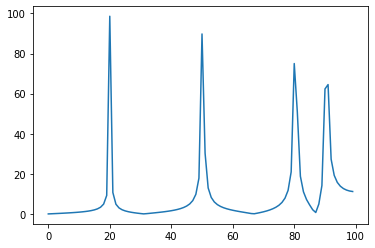

In [46]:
N = result.size
resulthalf = result[:N//2]

plt.plot(np.abs(resulthalf)) # plotting the half

Looks nice but not quite right with respect to frequencies we had used.

The transformed signal contains the following information:

- Amplitude of the sinoid is the absolute value of the returned signal value.
- Shift is the angle between the real and the imaginary part of the returned signal value.
- Frequency information is directly encoded with the returned signal value it is just scaled to the sample size

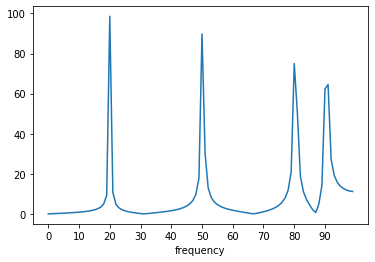

In [47]:
interval = ts[1] - ts[0]
ks = np.linspace(0, 1 / interval, N)
kshalf = ks[:N//2]
plt.xlabel("frequency")
plt.xticks(np.arange(min(kshalf), max(kshalf)+1, 10))
plt.plot(kshalf,np.abs(resulthalf)) # plotting the half

Now this is way better we can clearly get our original signal frequencies.

Here are some properties of Fourier transforms


| Property           | Signal            | Transform            |
|--------------------|-------------------|----------------------|
| superposition      | $f_1(x) + f_2(x)$ | F_1 (ω) + F_2(ω)     |
| shift              | $f(x − x_0)$      | $F(ω)e^{-jωx_0}$     |
| reversal           | f(−x)             | $F∗(ω)$              |
| convolution        | f(x) ∗ h(x)       | $F(ω)H(ω)$           |
| correlation        | f(x) ⊗ h(x)       | $F(ω)H∗(ω)$          |
| multiplication     | f(x)h(x)          | $F(ω)∗H(ω)$          |
| differentiation    | f(x)              | $jωF(ω)$             |
| domain scaling     | f(ax)             | $\frac{1}{aF (ω/a)}$ |
| real images        | $f(x) = f∗(x)$    | $F(ω) = F(−ω)$       |
| Parseval’s Theorem | $\sum_x[f(x)]^2 $ | $\sum_{w}[F(w)]^2$   |

Table from Szeliski, Richard 2011, p.118, table 3.1

- Superposition: The Fourier transform of a sum of signals is the sum of their Fourier
transforms. Thus, the Fourier transform is a linear operator.
- Shift: The Fourier transform of a shifted signal is the transform of the original signal
multiplied by a linear phase shift (complex sinusoid).3.4 Fourier transforms
119
- Reversal: The Fourier transform of a reversed signal is the complex conjugate of the
signal’s transform.
- Convolution: The Fourier transform of a pair of convolved signals is the product of
their transforms.
- Correlation: The Fourier transform of a correlation is the product of the first transform
times the complex conjugate of the second one.
- Multiplication: The Fourier transform of the product of two signals is the convolution
of their transforms.
- Differentiation: The Fourier transform of the derivative of a signal is that signal’s
transform multiplied by the frequency. In other words, differentiation linearly empha-
sizes (magnifies) higher frequencies.
- Domain scaling: The Fourier transform of a stretched signal is the equivalently com-
pressed (and scaled) version of the original transform and vice versa.
- Real images: The Fourier transform of a real-valued signal is symmetric around the
origin. This fact can be used to save space and to double the speed of image FFTs
by packing alternating scanlines into the real and imaginary parts of the signal being
transformed.
- Parseval’s Theorem: The energy (sum of squared values) of a signal is the same as
the energy of its Fourier transform.


Up to now we had worked with 1d data. What about 2 d data, like images ?

Again as in the previous case we are dealing with a discrete version:
If M and N are width and height of the image respectively, the discrete version
of fourier transform applied to an image is the following:

$$
\hat{f}(k_w, k_h) = \frac{1}{M * N} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot e^{-i2 \pi (\frac{(k_w *x) + (k_h * y)}{M * N} ) }
$$

Let's implement this function in standard library.

In [2]:
import cmath
from typing import List
import numpy as np

def dft_2d(N, M, k_w, k_h, y, x, image: np.ndarray):
    "The function that is being integrated"
    k_xx = k_w * x
    k_yy = k_h * y
    frac = (k_xx + k_yy) / N * M
    eterm = cmath.exp(2j * cmath.pi * frac)
    return image[y, x] * eterm


def dft_2d_sum(rowN, colM, k_w, k_h, image: np.ndarray):
    "dft_2d summation"
    sumval = complex(0)
    frac = 1 / rowN * colM
    for x in range(colM):
        for y in range(rowN):
            sumval += dft_2d(N=rowN, M=colM, k_w=k_w, k_h=k_h, y=y,x=x, image=image)
    return frac * sumval
    

def discrete_fourier_transform_2d(image: np.ndarray):
    "Implementation of discrete fourier transform in standard library"
    colM = image.shape[1]
    rowN = image.shape[0]
    k_xs = list(range(colM))
    k_ys = list(range(rowN))
    transform = np.zeros_like(image)
    frac = 1 / colM * rowN
    for k_h in range(rowN):
        for k_w in range(colM):
            dft_kwh = dft_2d_sum(rowN=rowN, colM=colM, k_w=k_w, k_h=k_h, image=image)
            transform[k_w, k_h] = dft_kwh
    return transform

Let's see the function in use. 
We are going to use numpy implementation of dft to implement a filter called wiener filter. 

Now we ask ourselves what is an image ?

An image from the point of view of frequencies is simply a random distribution of a range of values. 
An image of something, some object, on the other hand, is still a distribution of range of values but this time, we observe some form of regularity with respect to certain frequencies. 

We know from Fourier Transform that if have a frequency range that is regular we can find the values corresponding to this range. 
The set of magnitude of the signal for a given frequency range is known as the power spectrum of the signal for given frequencies, and it is calculated as the following:
$$ PS(f(x,y)) = |\hat{f}(x,y)|^2$$ 

Let's see how we can apply this to images in order to obtain images with less noise.

A noisy image is: $out(x,y) = in(x,y) + noise(x,y)$. 

Meaning that it is the result of an original image plus some form of noise.

We observe the $out$ image, and we want to recover $in$ image.

As mentioned above, the fourier transform supports superposition: 
$$ out(x,y) = in(x,y) + noise(x,y) \to \hat{o}(x,y) = \hat{in}(x,y) + \hat{noise}(x,y)$$

From these information we can compute an optimum filter that would denoise our image. 
This optimum filter is called Weiner filter.

$$ W(k_x, k_y) = \frac{1}{1 + \sigma_{n}^2 / PS} = in_{opt}(x,y) = \hat{out}(x,y) \frac{1}{1+P_n / P_s}$$

For actual steps of this computation required to derive this filter see, Szeliski 2011, p. 124.


Let's implement this.

In [3]:
def psf_from_image(img: np.ndarray):
    "obtain psf from image"
    # rfft2 => real valued fourier transform
    return np.abs(np.fft.rfft2(img.copy())) ** 2

def weiner(out_fft: np.ndarray,
           p_n: np.ndarray, 
           p_s: np.ndarray):
    channel_coeff = 1 / (1 + (p_n / p_s))
    return out_fft * channel_coeff

First let's choose an image

[]

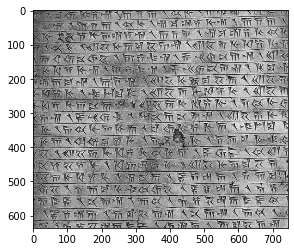

In [7]:
# load image
from PIL import Image, ImageOps
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt 
import random

img = ImageOps.grayscale(Image.open("image/im1.jpg"))
#img = Image.open("image/im1.jpg")
imarr = np.array(img)
rownb = imarr.shape[0]
randoms = [random.choice(list(range(255))) for i in range(rownb)]
plt.imshow(imarr, cmap="gray")
plt.plot()

Let's see its power spectrum

[]

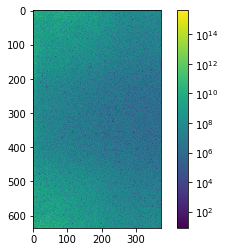

In [8]:
psf_im = psf_from_image(imarr)
plt.imshow(psf_im, norm=LogNorm(vmin=8))
plt.colorbar()
plt.plot()

(636, 745)


[]

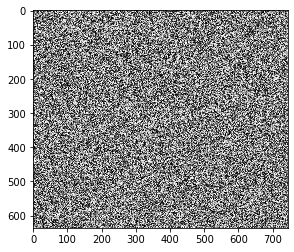

In [9]:
# let's plot some noise
noise = np.random.uniform(0, 255, imarr.shape)
print(imarr.shape)
plt.imshow(noise, cmap="gray")
plt.plot()

Let's combine the noise with the image

(636, 745)


[]

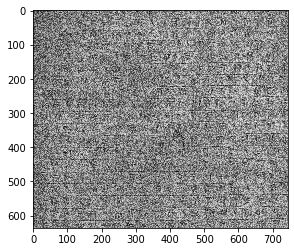

In [11]:
out = imarr.copy() + noise
print(out.shape)
plt.imshow(out, cmap="gray")
plt.plot()

(636, 745)


[]

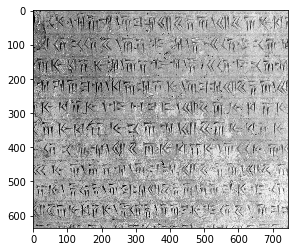

In [12]:
# Let's take a similar image
# Wikipedia copyright notice for the image
# By No machine-readable author provided. 
# Ginolerhino assumed (based on copyright claims). 
# - No machine-readable source provided. 
# Own work assumed (based on copyright claims)., 
# CC BY 2.5, https://commons.wikimedia.org/w/index.php?curid=665204
simimg = ImageOps.grayscale(Image.open("image/im2.jpg"))
# changing the size of the image to match the input
simimg = simimg.resize(img.size)
simimg = np.array(simimg)
print(simimg.shape)
plt.imshow(simimg, cmap="gray")
plt.plot()

In [13]:
 # Now let's apply our formula to denoise the image
sim_img_psf = psf_from_image(simimg)
psf_noise = psf_from_image(noise)
out_fft = np.fft.rfft2(out.copy())
s_orig_fft = weiner(out_fft=out_fft, p_n=psf_noise, p_s=sim_img_psf)
s_orig = np.fft.irfft2(s_orig_fft)

[]

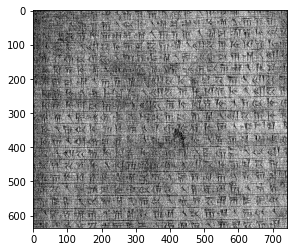

In [14]:
plt.imshow(s_orig, cmap="gray")
plt.plot()

In [15]:
Image.fromarray(s_orig.copy()).show()

Now let's make this pipeline into a function

In [16]:
def weiner_denoising(original_image: Image, similar_image: Image,
                    similar_noise=None):
    original_arr = np.array(original_image)
    similar_image = similar_image.resize(original_image.size)
    if similar_noise is None:
        similar_noise = np.random.uniform(0, 255, original_arr.shape)
    similar_arr = np.array(similar_image)
    sim_img_psf = psf_from_image(similar_arr)
    psf_noise = psf_from_image(similar_noise)
    original_fft = np.fft.rfft2(original_arr.copy())
    weiner_out = weiner(out_fft=original_fft, p_s=sim_img_psf, p_n=psf_noise)
    return np.fft.irfft2(weiner_out)

In [17]:
weiner_result = weiner_denoising(original_image=Image.fromarray(out), 
                                 similar_image=Image.fromarray(simimg))

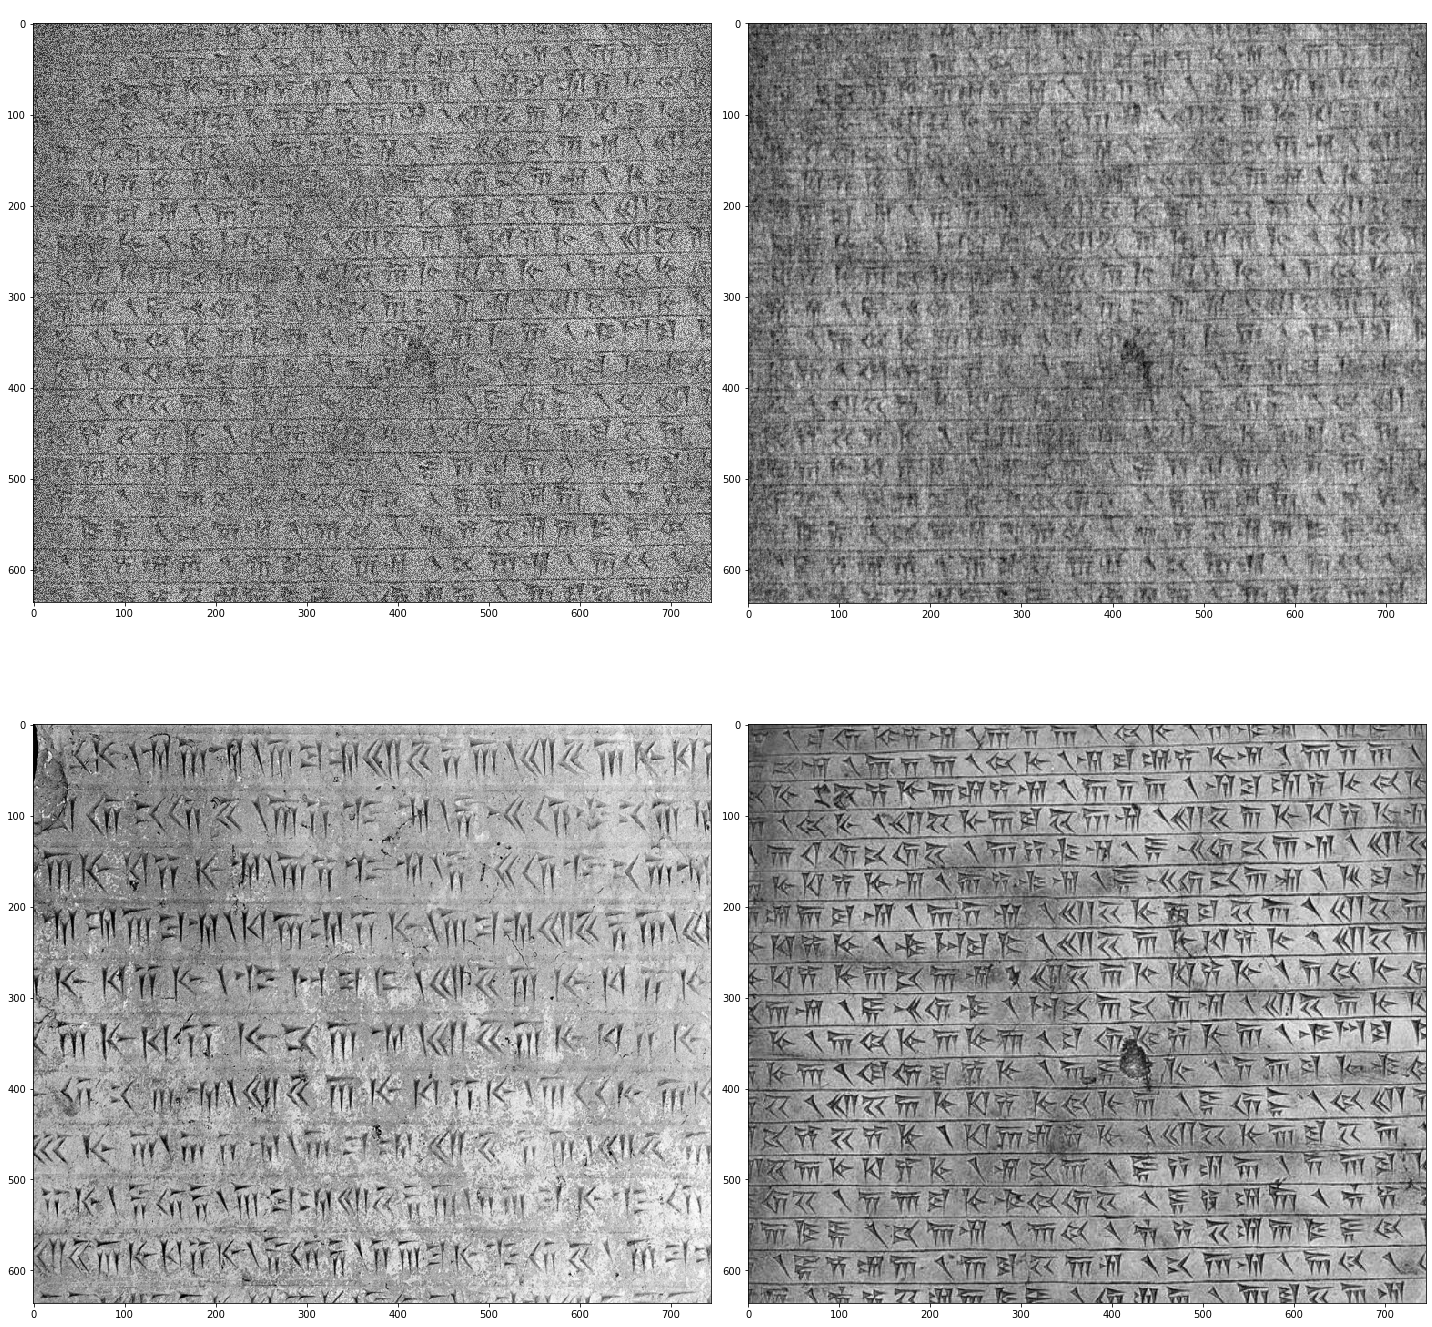

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
axes[0,0].title.set_text("Observed Image")
axes[0,0].title.set_color("white")
axes[0,0].imshow(out, cmap="gray")
axes[0,1].title.set_text("Weiner filter output")
axes[0,1].title.set_color("white")
axes[0,1].imshow(weiner_result, cmap="gray")
axes[1,0].title.set_text("Similar Image")
axes[1,0].title.set_color("white")
axes[1,0].imshow(simimg, cmap="gray")
axes[1,1].title.set_text("Original Image")
axes[1,1].title.set_color("white")
axes[1,1].imshow(imarr, cmap="gray")
fig.tight_layout()

## References

- Saul, Mark. 2001. Trigonometry. Boston.
- Szeliski, Richard. 2011. Computer Vision: Algorithms and Applications. Texts in Computer Science. London: Springer.
